In [1]:
import json
import matplotlib.pyplot as plt

In [7]:
# Load the log file
log_file_path = "/nfs/dgx/raid/rs/rs/results/maid_ibot_base_fa2_ddp/log.txt"
with open(log_file_path, "r") as file:
    log_lines = file.readlines()

# Parse the JSON entries
logs = [json.loads(line) for line in log_lines[:-7]]

# Extracting data for plotting
data = {}
for log in logs:
    for key, value in log.items():
        if key not in data:
            data[key] = []
        data[key].append(value)

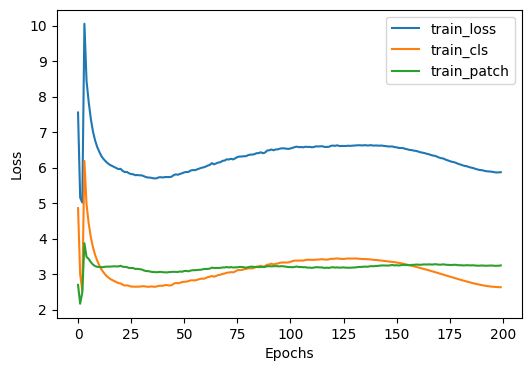

In [15]:
# Plotting each metric across epochs
plt.figure(figsize=(6,4))
fig.tight_layout(pad=5.0)
for i, (key, values) in enumerate(data.items()):
    if key in ['train_loss', 'train_cls', 'train_patch']:
        plt.plot(data['epoch'], values, label=key)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.show()
plt.savefig('ibot-loss.pdf')